In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [2]:
!pip install matplotlib seaborn scikit-learn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 578.7 kB/s eta 0:00:14
   -- ------------------------------------- 0.5/8.1 MB 578.7 kB/s eta 0:00:14
   -- ------------------------------------- 0.5/8.1 MB 578.7 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.1 MB 486.4 kB/s eta 0:00:15
   --- ------------------------------------ 0.8/8.1 MB 486.4 kB/s eta 0:00:15
   --- ------------------------------------ 0.8/8.1 MB 486.4 kB/s eta 0:00:15
   --- ------------------------------------ 0.8/8.1 MB 486.4 kB/s eta 0:00:15
   --- ---------------------------------

In [4]:
df = pd.read_csv('breast cancer data.csv')  # update this
df.head()
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
#preprocessing data
# Drop columns with too many missing values or fill them
df = df.dropna()


# Encode 'diagnosis' instead of 'priority' if that's your label
label_encoder = LabelEncoder()
df['diagnosis_encoded'] = label_encoder.fit_transform(df['diagnosis'])

# Define features and target
X = df.drop(['diagnosis', 'diagnosis_encoded'], axis=1)
y = df['diagnosis_encoded']

# Scale features (optional but improves performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
#. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
y_pred = model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))  # good for multi-class
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.956140350877193
F1 Score: 0.9554882874504246
              precision    recall  f1-score   support

           B       0.94      1.00      0.97        72
           M       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



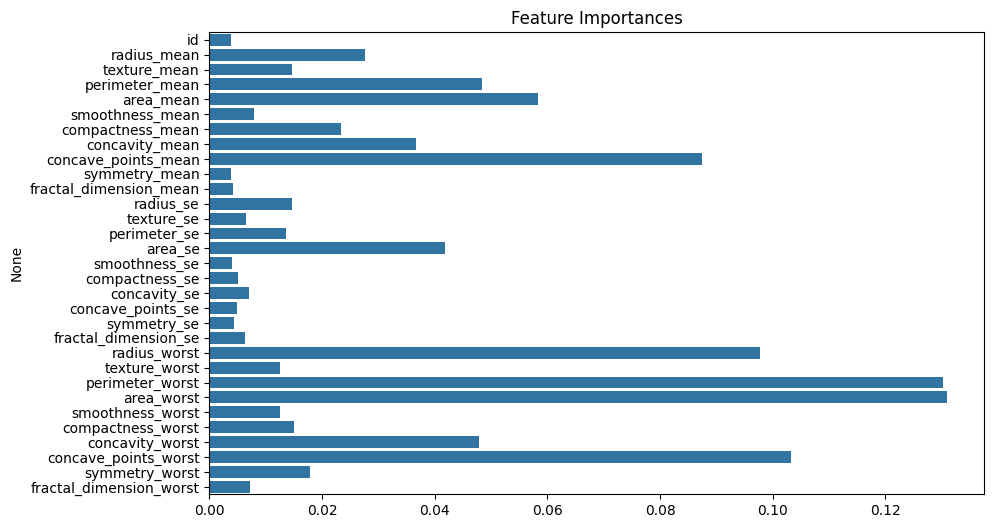

In [13]:
# Feature importance
importances = model.feature_importances_
feat_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feat_names)
plt.title('Feature Importances')
plt.show()


In [14]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", pd.Series(y_train).value_counts())
print("y_test distribution:\n", pd.Series(y_test).value_counts())


X_train shape: (455, 31)
X_test shape: (114, 31)
y_train distribution:
 diagnosis_encoded
0    285
1    170
Name: count, dtype: int64
y_test distribution:
 diagnosis_encoded
0    72
1    42
Name: count, dtype: int64


In [15]:
label_encoder.classes_


array(['B', 'M'], dtype=object)